# Uniqueness plot: $M$-distance vs. Euclidean distance


### Notation:

- $m$ = Number of modules
- $k$ = Dimension of the input space
- $S$ = Scales of the module
- $B$ = Array of bases for each module
    - Each basis is encoded as a non-singular matrix $B_{i} \in \mathbb{R}^{k \times k}$ ($i=1,\ldots,m$)
    - We assume that the first two columns span a $2$d grid in the $xy$-plane, cf. details below
- $X, X'$ = two sets of sampled points in the input space
- $Q,Q'$ = Corresponding Points on the $2m$-dimensional phase torus

### Abbreviations

- $X', Q', \ldots$ will in code be denoted by ```X_, Q_, ...``` 

### Computation of phases

We mimic grid cells with band-like extensions of their firing fields into $k$ dimensions.
Think of the first $2$ dimensions of $\mathbb{R}^k$ as the $xy$-plane, where the $2$d grids live.
For simplicity we assume that the underlying $2$d grids are orthogonal (and not hexagonal). That
means for the $i$th module the first two columns of the matrix $B_i$ encoding the basis are of the form

$$
    s_i \cdot \begin{bmatrix} 
           \cos(\theta_i) \\
           \sin(\theta_i) \\
           0 \\
           \vdots \\
           0
         \end{bmatrix}  
         \ \ \text{ and } \ \ 
      s_i \cdot    \begin{bmatrix} 
           \cos(\theta_i + \pi/2) \\
           \sin(\theta_i + \pi/2) \\
           0 \\
           \vdots \\
           0
         \end{bmatrix},
$$

where $\theta_i$ is the orientation of the grid and $s_i$ denotes its scale. Then, ror a given location $x \in \mathbb{R}^k$ we compute the $2$d phases $\phi^{(i)}(x)$ of the $i$th module by

$$
    \phi^{(i)}(x) = \underbrace{\begin{bmatrix} 
           1 & 0 & 0 & \cdots & 0  \\
           0 & 1 & 0 & \cdots & 0  
         \end{bmatrix}}_{
             \substack{\text{projection onto first}\\\text{ first two components}}
             } 
             \cdot \underbrace{B_{i}^{-1} \cdot x}_{\substack{\text{$x$ expressed} \\ \text{in base $B_i$}}} \ \ \ (\text{mod } 1)
$$

### How do we measure uniqueness?

- We need to keep track of the density of sampling, the $k$-dimensional volume grows exponentially, so we can't really sample dense enough for high $k$
- What is the right threshold to call two phase codes different? What metric should we use?
- ...


In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2



m = 7
k = 3
S = np.sqrt(2)**np.arange(m)
B = create_module_basis(m, k, S)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


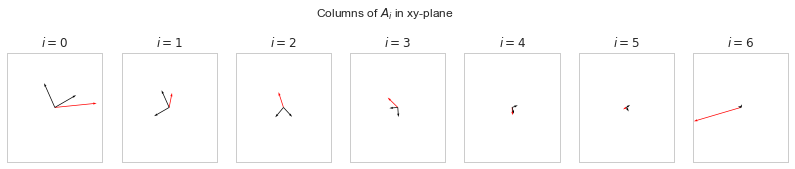

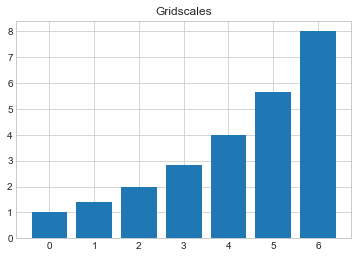

In [112]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Columns of $A_{i}$ in xy-plane", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)



A = create_action_tensor(B)

for i in range(m):
    ax[i].set_title("$i={}$".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    r1 = A[i,0,:] 
    r2 = A[i,1,:] 

    
    for l in range(2,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")
    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()



fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.bar(range(m), S)


# plt.savefig("media/summary/{}d_scales_m{}.pdf".format(k,m), dpi=150)
plt.show()


## Input samples

- Uniform sample from $k$-dimensinoal ball of radius $r$
- Then add some additional samples for fixed radii, this makes the visualization look nicer

Notation

- $n$ = Number of samples
- $r$ = radius of ball
- $vol$ = volume of $k$-dimensional ball of radius $r$

In [114]:
from scipy.special import gamma as Gamma
r = 10.
n = 10**6


def vol(k,r=1.):
    return np.pi**(k/2.) / Gamma(k/2. + 1) * (r**k)

den = n/vol(k,r)

summary = \
"Volume of the {}-dimensional ball of radius {}: {}".format(k, r, vol(k,r)) + \
"\nSamples per volume: {}".format(den) + \
"\n"  + \
"\nDensity of 10 per bins per axis : {}".format(10**k) + \
"\nThis gives a number samples: {}".format(vol(k,r)*(10**k)) + \
"\n"  + \
"\nDensity of {} per bins per phase : {}".format(10, 10**(2*m))


print summary

print 1./(0.1**(2*m)) , vol(2*m,0.1)
print 1/vol(2*m,0.05)




1000000
Volume of the 3-dimensional ball of radius 10.0: 4188.79020479
Samples per volume: 238.732414638

Density of 10 per bins per axis : 1000
This gives a number samples: 4188790.20479

Density of 10 per bins per phase : 100000000000000
1e+14 5.99264529321e-15
2.73401798344e+18


In [55]:

"""
First sample is the zero vector
"""
X_ = np.zeros((1,k))


"""
First uniformly sample 
from $k$-dim ball of radius r
"""

D   = np.random.multivariate_normal(mean=np.zeros(k),cov=np.eye(k), size=n) 
D   = D/ np.sqrt(np.sum(D**2, axis=1, keepdims=True))
U   = np.random.uniform(size=(n,1))
X_r = r*D*(U**(1./k))
X_ = np.concatenate([X_, X_r], axis=0)


"""
Add additional samples for fixed
radii, including zero
"""

radii   = np.linspace(0.,r, num=100)
n_per_r = 10

for r in radii:
    D = np.random.multivariate_normal(mean=np.zeros(k),cov=np.eye(k), size=n_per_r) 
    D = D/np.sqrt(np.sum(D**2, axis=1, keepdims=True))
    X_ = np.concatenate([X_, r*D], axis=0)
    



X = np.zeros(X_.shape)
    

Q  = map_to_hypertorus(B, X )
Q_ = map_to_hypertorus(B, X_)    
   
print Q.shape, Q_.shape
print np.min(Q), np.max(Q)
print np.min(Q_), np.max(Q_)

(10001001, 3, 2) (10001001, 3, 2)
0.0 0.0
0.0 0.999999980488


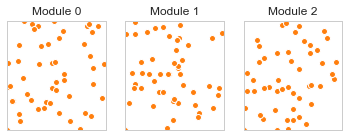

In [56]:

fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    ax[i].scatter(Q[:50,i,0],Q[:50,i,1], edgecolor='white')
    ax[i].scatter(Q_[:50,i,0],Q_[:50,i,1], edgecolor='white')
    ax[i].set_title("Module {}".format(i))

plt.show()


In [57]:

md     = M_dist(Q, Q_, S=None)
md_max = M_dist_max(Q, Q_, S=None)
ed     = np.linalg.norm(X - X_,  axis=1)


imap  = np.digitize(ed, radii) - 1

index_set = range(len(radii))




x = radii
y1 = np.array([ np.max (md[imap==i]) for i in index_set   ])
y2 = np.array([ np.min (md[imap==i]) for i in index_set   ])
mu = np.array([ np.mean(md[imap==i]) for i in index_set   ])




In [58]:
nbh_radius = 0.05
ambiguous = np.where(md_max < nbh_radius)[0]



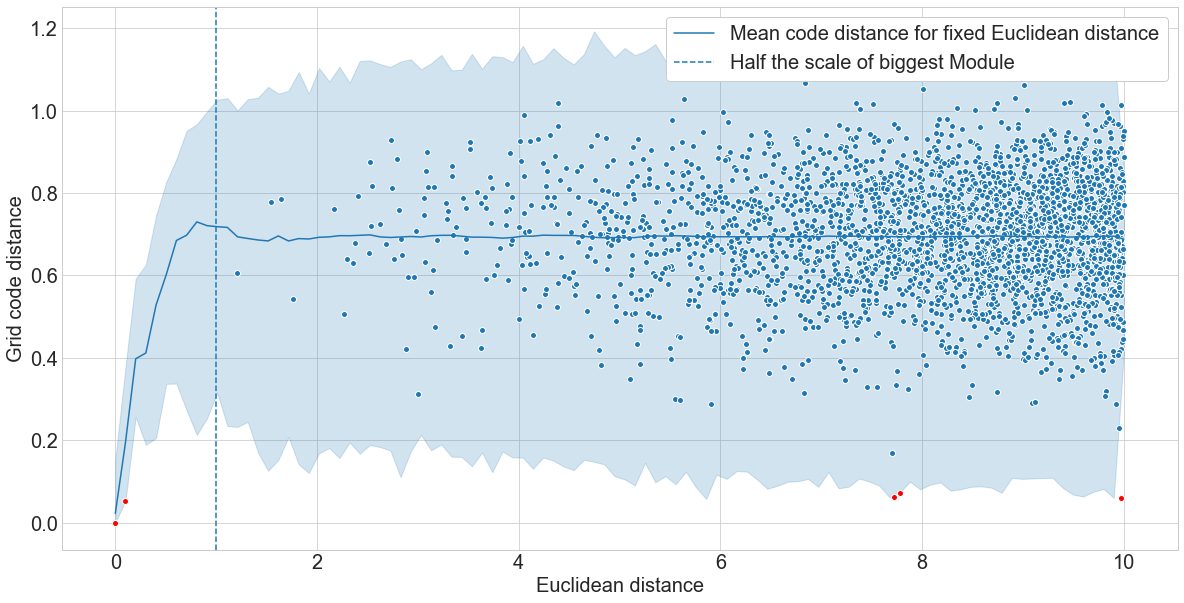

4 3


In [59]:
# plt.style.use('ggplot')
# plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10));




plt.fill_between(x ,y1, y2, alpha=.2, color="C0")


fs = 20
c = "C0"
plt.plot(x, mu, color=c, label="Mean code distance for fixed Euclidean distance")
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.scatter(ed[:3000], md[:3000], marker="o", color="C0", edgecolor="white", alpha=1);

plt.scatter(ed[ambiguous], md[ambiguous], marker="o", color="red", edgecolor="white", alpha=1);

# plt.ylim(0.)
# plt.xlim(0.,100)


plt.axvline(S[-1]/2.,linestyle='--', color=c, label="Half the scale of biggest Module".format(m))


plt.xlabel("Euclidean distance", fontsize=fs);
plt.ylabel("Grid code distance",    fontsize=fs);
plt.legend(frameon=True, framealpha=1., fontsize=fs, loc="upper right")
# plt.savefig("scatter.png", dpi=300, bbox_inches='tight')
plt.show()

print k, m


In [357]:
# l = len(radii)
# mus = np.zeros((20,l))
# y1s = np.zeros((20,l))
# y2s = np.zeros((20,l))


In [245]:

mus[k] = mu
y1s[k] = y1
y2s[k] = y2


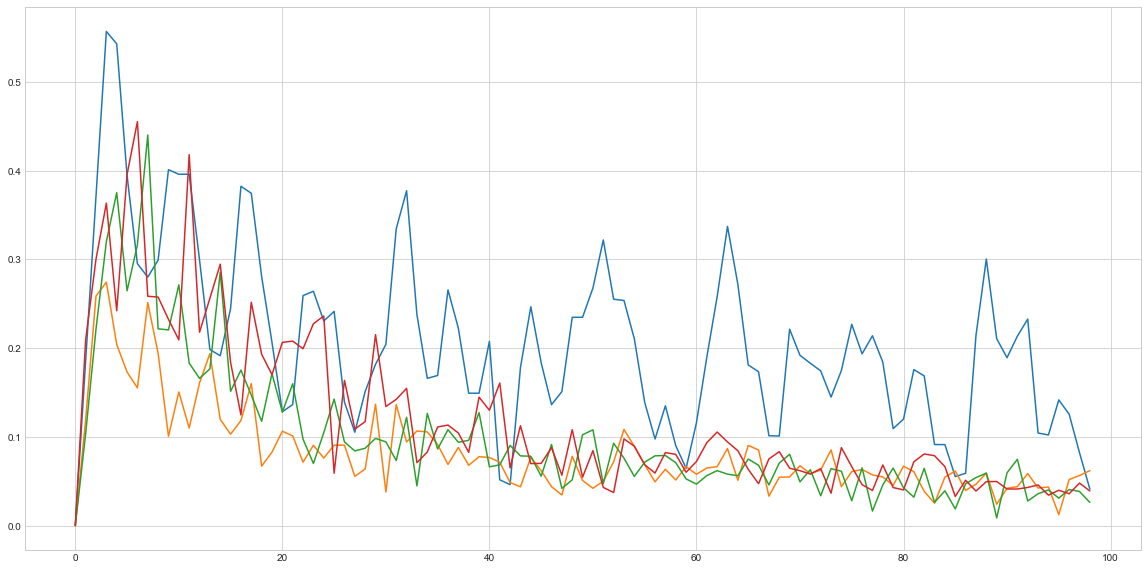

In [246]:
f = y2s[:,:-1]

plt.figure(figsize=(20,10))
plt.plot(f[2])
plt.plot(f[3])
plt.plot(f[4])
plt.plot(f[5])
# plt.plot(f[6])
# plt.plot(f[8])
# plt.plot(f[9])
# plt.plot(f[12])
# plt.plot(f[16])

plt.show()